# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [ ]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


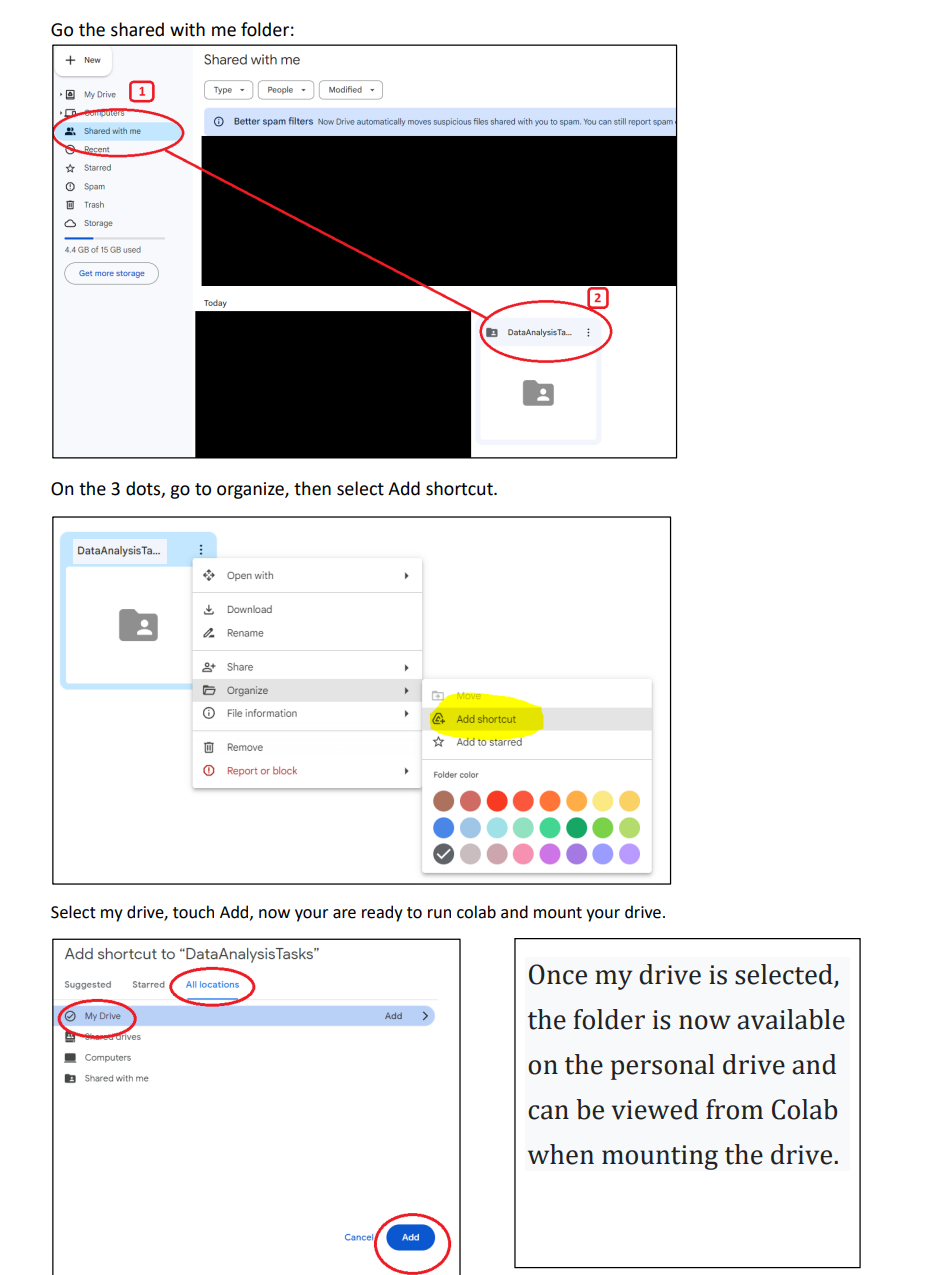

In [1]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/automobile.csv")
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")


CSV file loaded successfully, you can start working right now


## For interactive Bokeh plot this code has to be inside the cell of the Bokeh code.

In [ ]:
from bokeh.io import output_notebook
output_notebook()

-------------------------------------------------------------------------------------------------------------------




---



**AFTER THIS POINT YOU CAN START WORKING**

---








## 1. Data Manipulation

**Prompt**:

For the given Walmart sales data, write a Python program to create interactive Scatter plots for fuel price over time for all stores.

In [4]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, RangeTool
from bokeh.layouts import column
import pandas as pd

# Create a DataFrame representing walmart sales data
data = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/walmart_sales_data.csv")

df = pd.DataFrame(data)

# Convert date column to a time series
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, infer_datetime_format=True, format="%d/%m/%y")

source = ColumnDataSource(df)

# Calculate minimum and maximum date for time series
min_date = df['Date'].min()
max_date = df['Date'].max()

# Create the Bokeh figure
fig = figure(x_axis_type='datetime', height=400,
             title="Interactive Line Graph: Fuel prices vs. Date",
             x_axis_label = 'Date', y_axis_label = 'Fuel Price',
             x_range=(min_date, max_date))

# Add Fuel price dot circle
fig.circle_dot(x='Date', y='Fuel_Price', source=source, line_width=2, line_color='green')

# Add hover tool
hover = HoverTool()
hover.tooltips = [("Date", "@Date{%F}"),
                  ("Price", "@Fuel_Price{0.00}"),
                  ("Store", "@Store")]
hover.formatters = {'@Date': 'datetime'}
fig.add_tools(hover)

# Add new figure select to drag into primary figure
select = figure(title="Drag the middle and edges of the selection box to change the range above",
                height=130, y_range=fig.y_range,
                x_axis_type="datetime", y_axis_type=None,
                toolbar_location=None, background_fill_color="#efefef")

# Add range tool for select graph
range_tool = RangeTool(x_range=fig.x_range)
range_tool.overlay.fill_color = "navy"
range_tool.overlay.fill_alpha = 0.2

select.circle_dot('Date', 'Fuel_Price', source=source)
select.ygrid.grid_line_color = None
select.add_tools(range_tool)

# Output the plot directly in the notebook
output_notebook()
show(column(fig, select))